In [52]:
import pandas as pd
import numpy as np

In [53]:
df = pd.read_csv('titanic_train.csv')

In [54]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#Why do EDA

- Model Building
- Analysis and Reporting
- Validate assumptions
- Handling missing values
- Feature engineering
- Detecting outliers

In [55]:
# This is an iterative process

#Column Types
- Numerical - Age, Fare, Passengerrid
- Categorical - Surivved, Pclass, Sex, SibSp, Parch, Embarked
- Mixed - Name, Ticket, Cabin

#Univariate Analysis
Univariatve analysis focuses analyzing each feature independently
- Distribution analysis: The distribution of each feature is examined to identify its shape, central tendency and dispreson.
- Identifying potential issues: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness and missing values


The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distribution includes:
- Normal Distribution : A symmetrical and bell shaped distribution where the mean, median and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

- Skewed Distribution: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right skewed) or negativerly skewed (left-skewed)

- Bimodal Distribution : A distribution with two peaks or modes.

- Uniform Distribution : A distribution where all values have an equal dhange of occuring

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

#Dispersion
Dispersion is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data.
There are several measures of dispersion, including:
- Range: The difference between the largest and smallest values in a data set.
- Variance: The average of the squared deviations of each value for mean of the dataset.
- Standard Deviation: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.
- Interquartile range (IQR): The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.
- Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

#Steps of doing Univariate Analysis on Numerical columns
- Descriptive Statistics: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- Visualizations: Create visualizaatiosn to explore the distribution of the data.Some common visualizations for numerical data include histrograms, box plts, and density plots. These visualizatiosn provide a visual representation of the distribution of the data and can help identify skeweness an outliers.

- Identifying Outliers: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine wheter the outliers are due to measurment errors, data entry errors, or legitmate differences in the data, and to decide whether to include or exclude them from the analysis.

- Skewness: Check for skewness in the data and consider transforming the dat or using robust statistical methods that are less sensitive to skewness, if necessary.

- Conslusion: Summarize the findings of the EDA and make descisions about how to proceed with further analysis.

###Age

**conclusion**

- Age is normall (almost) distributed
- about 20% of the values ar emissing
- There are some outliers

In [56]:
df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


<Axes: ylabel='Frequency'>

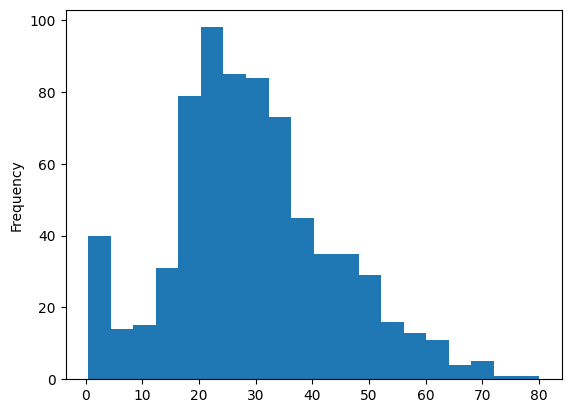

In [57]:
df['Age'].plot(kind='hist', bins=20)

<Axes: ylabel='Density'>

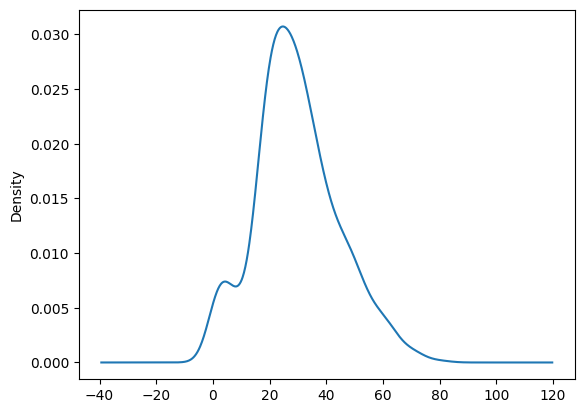

In [58]:
# This will give us the distribution of the data
df['Age'].plot(kind='kde')

In [59]:
# Calculate the skeweness
# If the number if near or is 0 then it's a good thing, but if it's way far in positive dir then it's called positive skew and vice versa for negative skew
df['Age'].skew()

np.float64(0.38910778230082704)

<Axes: >

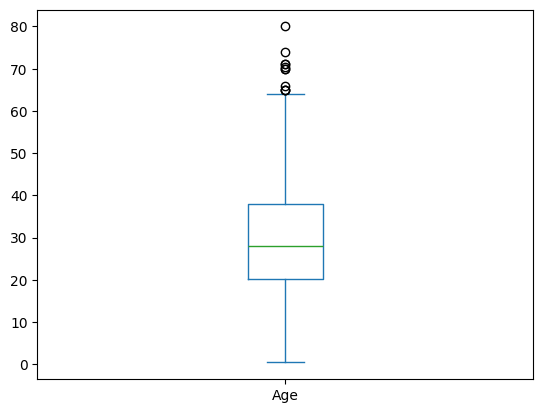

In [60]:
# Outliers
df['Age'].plot(kind='box')

In [61]:
# to check if the outliers in out data is actually outliers or it's just data
df[df['Age'] > 65]
# Here this is a legit data. Those are not outliers. So we dont need to remove them.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [62]:
df['Age'].isnull().sum()/len(df['Age']) # Means about 19% of the data is not valid (Na).

np.float64(0.19865319865319866)

###Fare

**Conclusions**

- The data is highly skewed (Positively Skewed)
- Fair column actually contains the group fare and not the individual fare. This might be an issue
- We need to create a new column called individual fare

In [63]:
df['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


<Axes: ylabel='Frequency'>

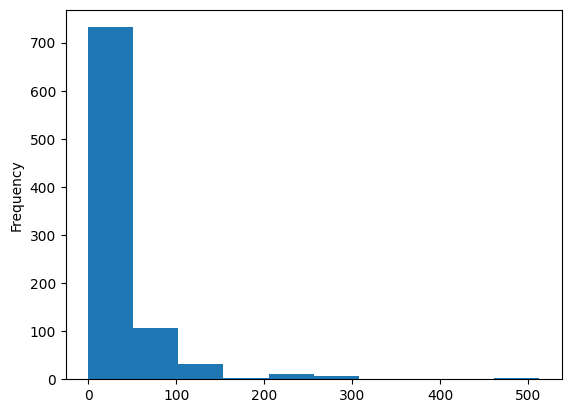

In [64]:
df['Fare'].plot(kind='hist')

<Axes: ylabel='Density'>

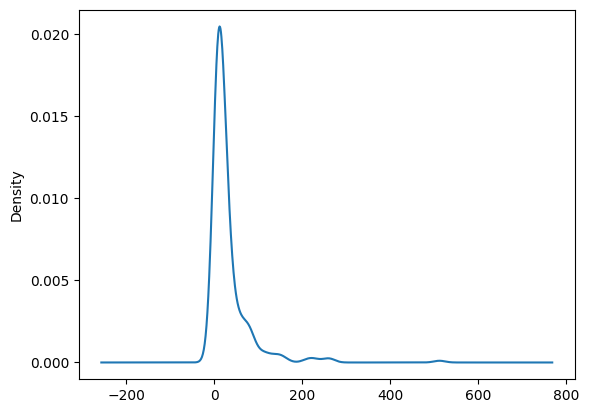

In [65]:
df['Fare'].plot(kind='kde')

In [66]:
df['Fare'].skew()
# This indicates that it's highly skewed

np.float64(4.787316519674893)

<Axes: >

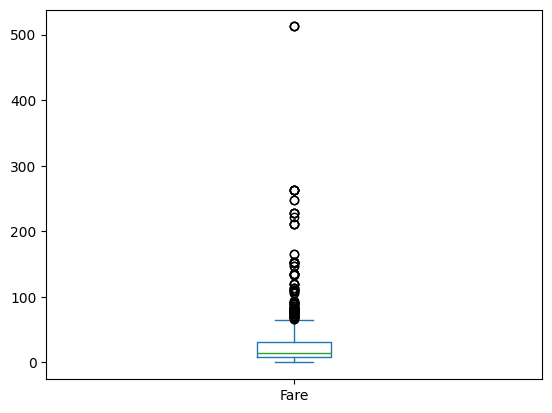

In [67]:
df['Fare'].plot(kind='box')

In [68]:
df[df['Fare'] > 250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [69]:
df['Fare'].isnull().sum()

np.int64(0)

# Steps of doing Univariate Analysis on Categorical Columns

**Descriptive Statistics**: Compute the frequency distribution of the categories in the column. This will give a general understaning of the distribution of the categories and their relative frequencies.

**Visualizations**: Create visualizations to explore the distribution of the categores. Some common visualizations for categorical data include count plots and pie charts. These visualizatiosn provide a visual representation of the distribution of the categores and can help identify any patters or anomalier in the data.

**Missing Values**: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the dataset.

**Conclusion**: Summarize the findings of the EDA and make descisions about how to proceed with further analysis

###Survived

**conclusions**

The accident was too deadly.
- Almost about 61% of the passengers died

<Axes: xlabel='Survived'>

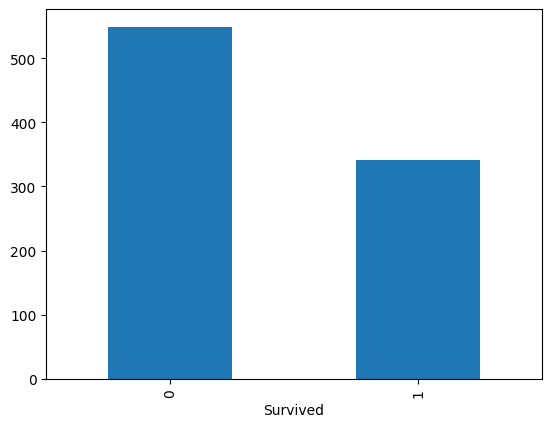

In [70]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

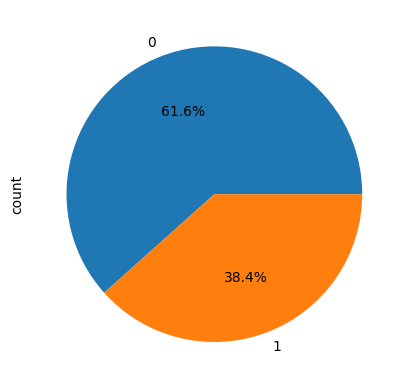

In [71]:
df['Survived'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [72]:
df['Survived'].isnull().sum()

np.int64(0)

###Pclass

**conclusions**

- Surprisingly, less people travelled in pclass 2 and more people travelled in pclass 1
- About 55% travelled in pclass 3

class 1 -> costly

class 2 -> mid

class 3 -> Cheap

In [73]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


<Axes: xlabel='Pclass'>

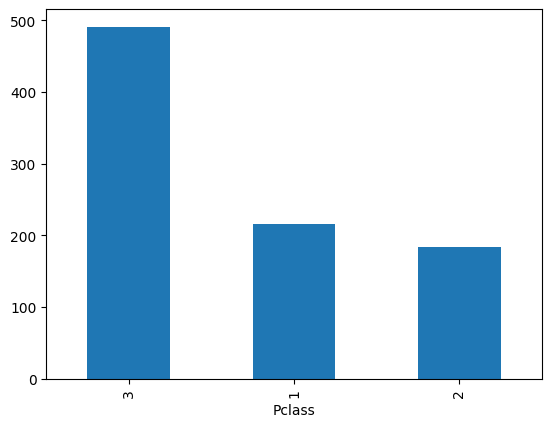

In [74]:
df['Pclass'].value_counts().plot(kind='bar')


<Axes: ylabel='count'>

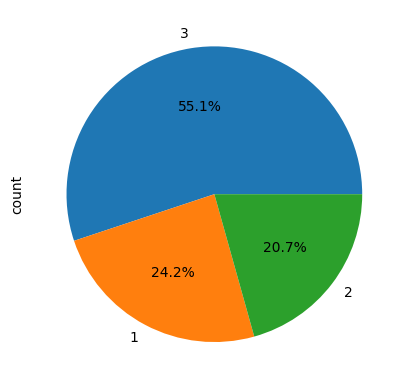

In [75]:
df['Pclass'].value_counts().plot(kind='pie', autopct='%0.1f%%')

### Sex

**Conclusions**

- There were about 577 males and 314 females
- Males were about 65% and females were about 35%

In [76]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex'>

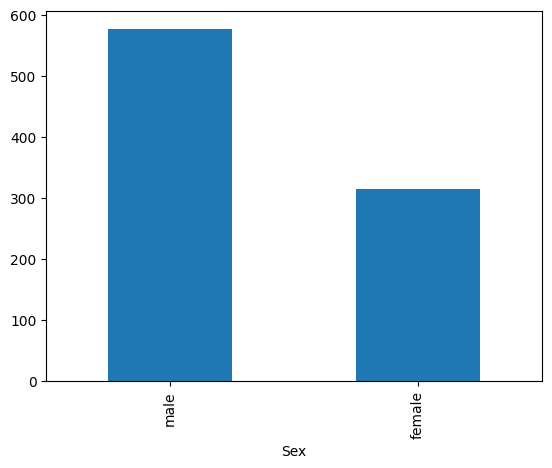

In [77]:
df['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

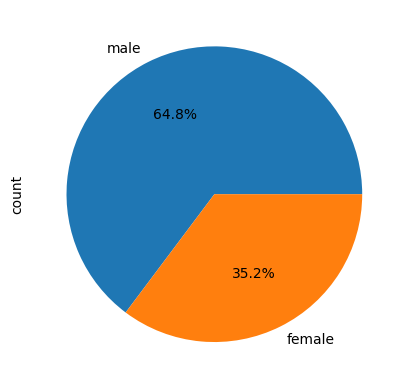

In [78]:
df['Sex'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [79]:
df['Sex'].isnull().sum()

np.int64(0)

### travelling with Siblings SibSp

**conclusions**
- About 68% of the passengers were travelling alone
- About 24% of the passengers were travelling with one siblings

In [80]:
df['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


<Axes: xlabel='SibSp'>

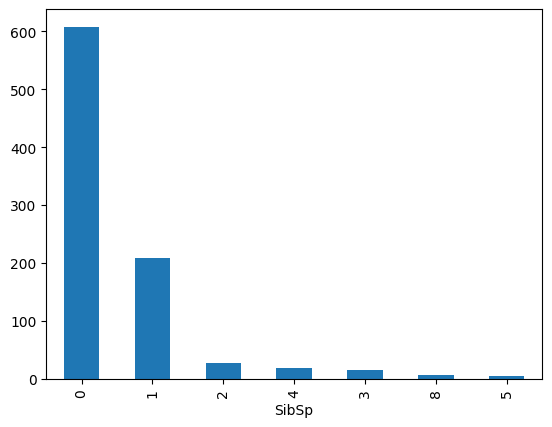

In [81]:
df['SibSp'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

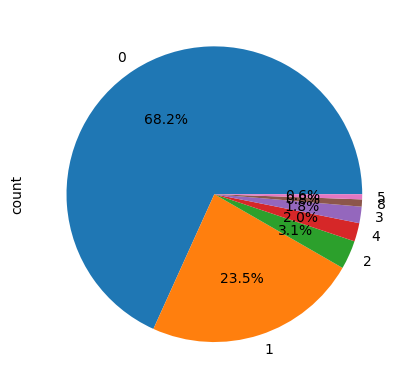

In [82]:
df['SibSp'].value_counts().plot(kind='pie',autopct='%0.1f%%')

#Parent Child

**Conclusions**

- About 76% of the passengers were travelling without parent child
- Parch and SibSp columns can be merged to form a new column called family size
- Create a new column called is_alone

In [83]:
df['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


<Axes: xlabel='Parch'>

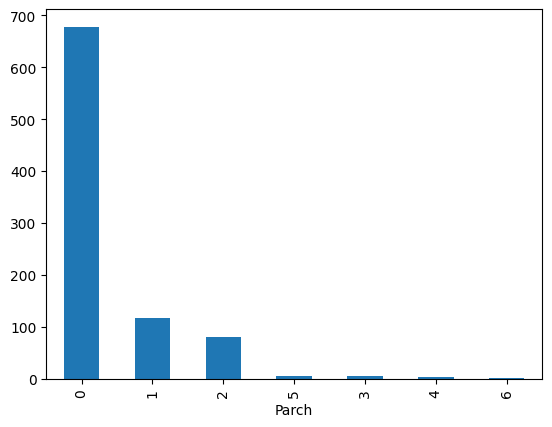

In [84]:
df['Parch'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

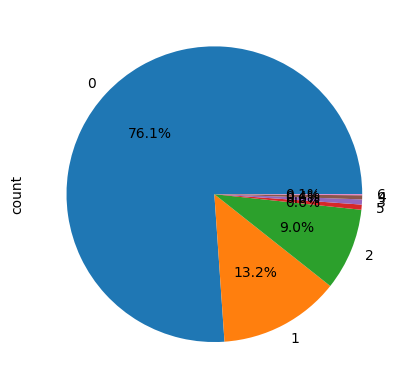

In [85]:
df['Parch'].value_counts().plot(kind='pie',autopct='%0.1f%%')

### Embarked -> Location from where the passengers boarded into the ship

**Conclusion**

In [86]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


<Axes: xlabel='Embarked'>

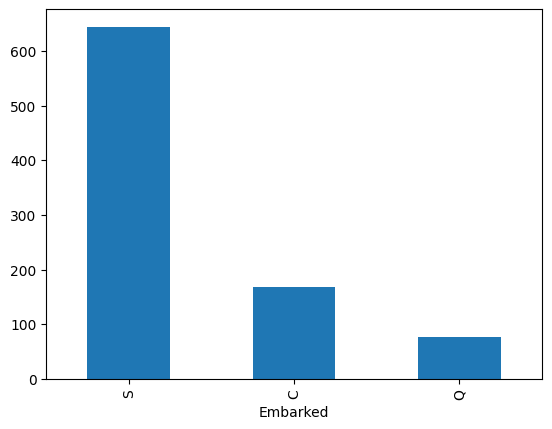

In [87]:
df['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

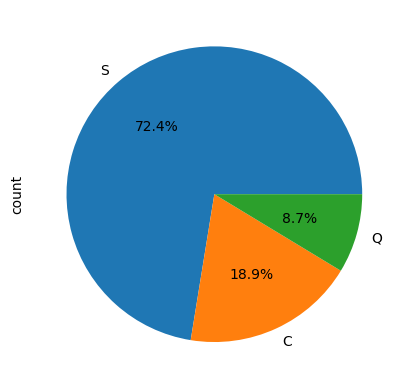

In [88]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

# Mixed Columns

- Firstly need to feature engineer the columns to get mixed columns analysis

# **Bivariate Analysis**

Steps of doing Bivariate Analysis

- Understand type of relationship
1. Numerical - Numerical
*   You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots
*   Check correlation coefficent to check linear relationship
2. Numerical - Categorical - create visuallzations that compare the distribution of the numerlcal data across different categories of the categorical data.
- You can plot graphs lke barplot, boxplot, kdeplot violinplot even scatterplots
3. Categorical- Categorical
- You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.
- You can plots like heatmap, stacked barplots, treemaps
- Write your conclusions


In [89]:
pd.crosstab(df['Survived'],df['Pclass'], normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

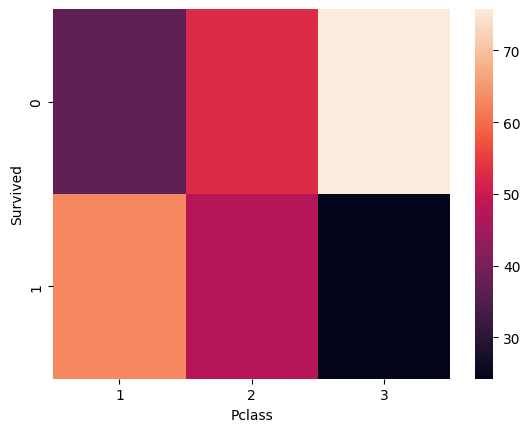

In [90]:
import seaborn as sns
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'], normalize='columns')*100)

In [91]:
pd.crosstab(df['Survived'],df['Sex'], normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


In [92]:
pd.crosstab(df['Survived'],df['Embarked'], normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


In [93]:
pd.crosstab(df['Sex'],df['Embarked'], normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [94]:
pd.crosstab(df['Pclass'],df['Embarked'], normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


In [95]:
from matplotlib import  pyplot as plt

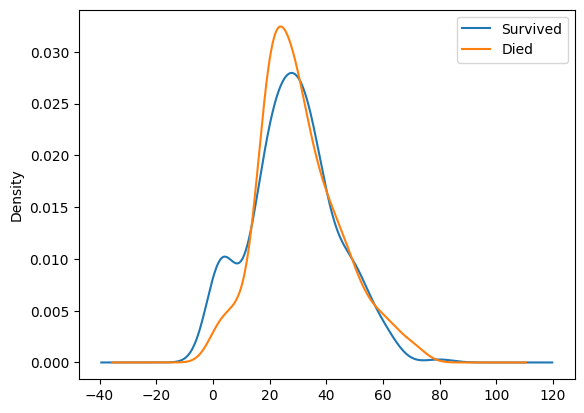

In [96]:
# relation between age and survival

df[df['Survived'] == 1]['Age'].plot(kind='kde', label = 'Survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde', label = 'Died')

plt.legend()
plt.show()

In [97]:
df[df['Pclass']==1]['Age'].mean()

np.float64(38.233440860215055)

In [98]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [99]:
# Feature Engineering on Fare col

df['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [100]:
df[df['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [101]:
df[df['Name'].str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [102]:
df1 = pd.read_csv('test.csv')

In [103]:
df = pd.concat([df,df1])

In [104]:
df[df['Name'].str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1.0,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S


In [105]:
df[df['Ticket'] == 'CA 2144']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0.0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0.0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0.0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0.0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0.0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0.0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S
139,1031,NaN,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9,NaN,S
140,1032,NaN,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9,NaN,S


In [106]:
df['individual_fare'] = df['Fare'] / (df['SibSp'] + df['Parch'] + 1)

In [107]:
df[['individual_fare','Fare']].describe()

,individual_fare,Fare
count,1308.000000,1308.000000
mean,20.518215,33.295479
std,35.774337,51.758668
min,0.000000,0.000000
25%,7.452767,7.895800
50%,8.512483,14.454200
75%,24.237500,31.275000
max,512.329200,512.329200


<Axes: >

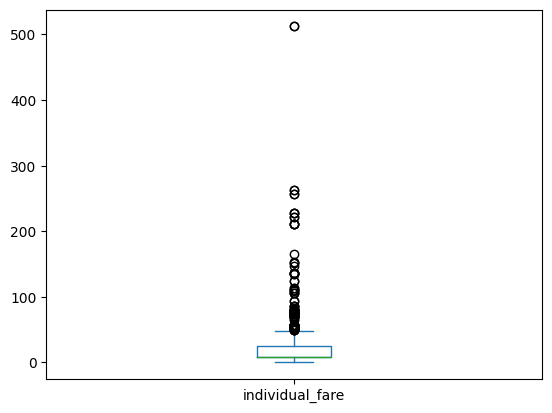

In [108]:
df['individual_fare'].plot(kind='box')

In [109]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000


In [110]:
df['family_size']  = df['SibSp'] + df['Parch'] + 1

In [111]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1


In [112]:
# family_type
# 1 -> Alone
# 2 - 4 -> small
# >5 -> large

def transform_family_size(num):
  if num == 1:
    return 'alone'
  elif num > 1 and num < 5:
    return 'small'
  else:
    return 'large'

In [113]:
df['family_type'] =  df['family_size'].apply(transform_family_size)

In [114]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone


In [115]:
pd.crosstab(df['Survived'],df['family_type'], normalize='columns')*100

family_type,alone,large,small
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


In [116]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone


In [117]:
df['surname'] =  df['Name'].str.split(',').str.get(0)

In [118]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone,Spector
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone,Oliva y Ocana
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone,Saether
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone,Ware


In [119]:
df['title'] =  df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [120]:
df['title'].value_counts()

,count
title,
Mr.,757
Miss.,260
Mrs.,197
Master.,61
Rev.,8
Dr.,8
Col.,4
Major.,2
Mlle.,2


In [121]:
df['Cabin'].isnull().sum()

np.int64(1014)

In [122]:
df['Cabin'].fillna('M',inplace=True)

<ipython-input-122-f53675b237fc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('M',inplace=True)


In [123]:
df['Cabin'].value_counts()

,count
Cabin,
M,1014
C23 C25 C27,6
G6,5
B57 B59 B63 B66,5
F33,4
...,...
C39,1
B24,1
D40,1


In [124]:
df['deck'] = df['Cabin'].str[0]

In [125]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,surname,title,deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,3.625000,2,small,Braund,Mr.,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small,Cumings,Mrs.,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,7.925000,1,alone,Heikkinen,Miss.,M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small,Futrelle,Mrs.,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,8.050000,1,alone,Allen,Mr.,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,M,S,8.050000,1,alone,Spector,Mr.,M
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone,Oliva y Ocana,Dona.,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,7.250000,1,alone,Saether,Mr.,M
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,M,S,8.050000,1,alone,Ware,Mr.,M


In [126]:
df['deck'].value_counts()

,count
deck,
M,1014
C,94
B,65
D,46
E,41
A,22
F,21
G,5
T,1


<Axes: xlabel='deck'>

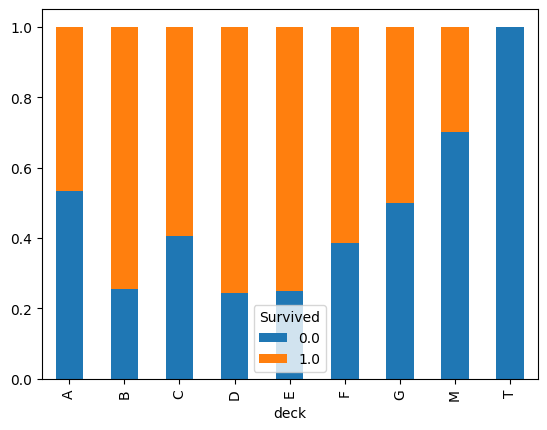

In [127]:
pd.crosstab(df['deck'],df['Survived'],normalize='index').plot(kind='bar',stacked=True)

##Logistic Regression

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [129]:
# Load the Titanic dataset
df = pd.read_csv('titanic_train.csv')

In [130]:
# Handle missing values (fill with median or drop rows, as needed)
df['Age'].fillna(df['Age'].median(), inplace=True)
df.dropna(subset=['Embarked'], inplace=True)

<ipython-input-130-02c07b212516>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [131]:
# Convert categorical columns to numeric (using encoding)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [132]:
# Features and target variable
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [134]:
# Train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [135]:
# Make predictions
y_pred = logreg.predict(X_test)

In [136]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7696629213483146
Confusion Matrix:
 [[84 25]
 [16 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.77      0.80       109
           1       0.68      0.77      0.72        69

    accuracy                           0.77       178
   macro avg       0.76      0.77      0.76       178
weighted avg       0.78      0.77      0.77       178



##Descision Tree

In [137]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Make predictions
y_pred_dtree = dtree.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtree))
print("Classification Report:\n", classification_report(y_test, y_pred_dtree))

Decision Tree Accuracy: 0.7415730337078652
Confusion Matrix:
 [[80 29]
 [17 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.73      0.78       109
           1       0.64      0.75      0.69        69

    accuracy                           0.74       178
   macro avg       0.73      0.74      0.74       178
weighted avg       0.75      0.74      0.74       178

